In [3]:
cd /content/drive/My Drive/Studier/Master/Master Thesis/Coding/

/content/drive/My Drive/Studier/Master/Master Thesis/Coding


In [0]:
# Test
%run ./c-LSTM-LM/testfile.py

ERROR:root:File `'./c-LSTM-LM/testfile.py'` not found.


Device type: cuda:0
Loading settings from: ./c-LSTM-LM/settings/settings.txt


------ Parameters -----
   settings_file:  settings.txt
         verbose:  1
            data:  ./dataset_creation/augmented_dataset4_sorted
      checkpoint:  ./c-LSTM-LM/checkpoint_03062020_1030/
          window:  10
       word_size:  20000
        word_dim:  512
      melody_dim:  256
            seed:  0
     num_workers:  4
      num_epochs:  25
      batch_size:  32
              lr:  0.001
    log_interval:  5
   save_interval:  5
      train_rate:  0.9
        val_rate:  0.1
       test_rate:  0
      num_layers:  3
      limit_data:  False


Loading data and creating word and syllable vocabularies.
Currently loading data from: sub_folder1
Number of corrupted files in subfolder: 0
Currently loading data from: sub_folder2
Number of corrupted files in subfolder: 0
Currently loading data from: sub_folder3
Number of corrupted files in subfolder: 0
Currently loading data from: sub_folder4
Number of corrupted files in subfolder: 0
Currently loading data from: sub_folder5
Number of corrupted files in subfolder: 0
Currently loading data from: sub_folder6
Number of corrupted files in subfolder: 0
Currently loading data from: sub_folder7
Number of corrupted files in subfolder: 0
Currently loading data from: sub_folder8
Number of corrupted files in subfolder: 0
Currently loading data from: sub_folder9
Number of corrupted files in subfolder: 0
Currently loading data from: sub_folder10
Number of corrupted files in subfolder: 0
Currently loading data from: sub_folder11
Number of corrupted files in subfolder: 0
Currently loading data from

------ Data Stats -----
Number of songs:  6716
  vocab size:  20004
feature size:  283
syllable size:  19


Training set:  6044  songs, Validation set:  672  songs, Test set:  724  songs.
model_summary

Layer_name							Number of Parameters
										

Embedding(20004, 512)			10314496

Linear(in_features=283, out_features=256, bias=True)			256

LSTM(768, 768, num_layers=3, batch_first=True)			2359296

Linear(in_features=768, out_features=20004, bias=True)			2359296

Linear(in_features=768, out_features=19, bias=True)			3072

ReLU(inplace=True)			2362368

BatchNorm1d(20004, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)			2359296

BatchNorm1d(19, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)			3072
Total Params:19761152


------ Training -----
| Training Epoch:   1/ 25     185/   189 | lr:0.00100 |  112.20 s/batch | 111011.21 ms/data_load | Loss(Syllable) 2.58560 | Loss(Lyrics) 8.50799 |
| Validation Epoch:   1/ 25      20/    21 | lr:0.00100 |    5.88 s/batch | 5382.89 ms/data_load | Loss(Syllable) 2.24161 | Loss(Lyrics) 7.62361 |


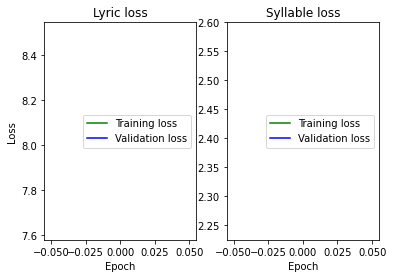

-----------
| Training Epoch:   2/ 25     185/   189 | lr:0.00100 |  112.09 s/batch | 110911.31 ms/data_load | Loss(Syllable) 2.16918 | Loss(Lyrics) 7.19416 |
| Validation Epoch:   2/ 25      20/    21 | lr:0.00100 |    5.73 s/batch | 5233.27 ms/data_load | Loss(Syllable) 2.03392 | Loss(Lyrics) 6.83298 |


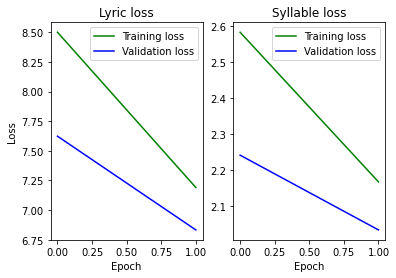

-----------
| Training Epoch:   3/ 25     185/   189 | lr:0.00100 |  112.23 s/batch | 111053.68 ms/data_load | Loss(Syllable) 1.85976 | Loss(Lyrics) 6.23997 |
| Validation Epoch:   3/ 25      20/    21 | lr:0.00100 |    5.94 s/batch | 5437.19 ms/data_load | Loss(Syllable) 1.77888 | Loss(Lyrics) 6.25824 |


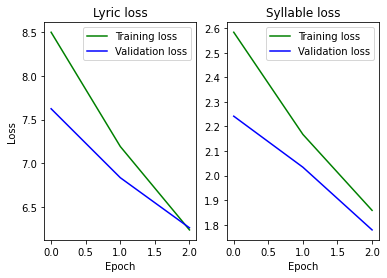

-----------
| Training Epoch:   4/ 25     185/   189 | lr:0.00100 |  111.69 s/batch | 110508.93 ms/data_load | Loss(Syllable) 1.57985 | Loss(Lyrics) 5.32350 |
| Validation Epoch:   4/ 25      20/    21 | lr:0.00100 |    6.15 s/batch | 5652.29 ms/data_load | Loss(Syllable) 1.58198 | Loss(Lyrics) 5.68215 |


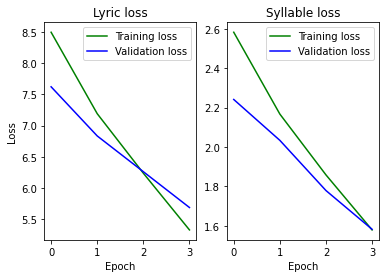

-----------
| Training Epoch:   5/ 25     185/   189 | lr:0.00100 |  112.92 s/batch | 111742.16 ms/data_load | Loss(Syllable) 1.30695 | Loss(Lyrics) 4.44589 |
| Validation Epoch:   5/ 25      20/    21 | lr:0.00100 |    6.20 s/batch | 5699.03 ms/data_load | Loss(Syllable) 1.35088 | Loss(Lyrics) 5.36125 |


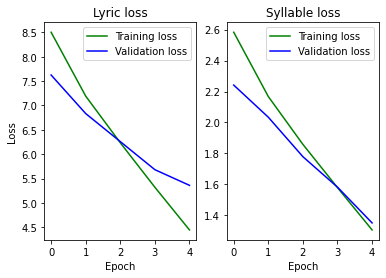

-----------
| Training Epoch:   6/ 25     185/   189 | lr:0.00100 |  112.27 s/batch | 111082.42 ms/data_load | Loss(Syllable) 1.04893 | Loss(Lyrics) 3.66786 |
| Validation Epoch:   6/ 25      20/    21 | lr:0.00100 |    6.36 s/batch | 5865.01 ms/data_load | Loss(Syllable) 1.16884 | Loss(Lyrics) 5.16905 |


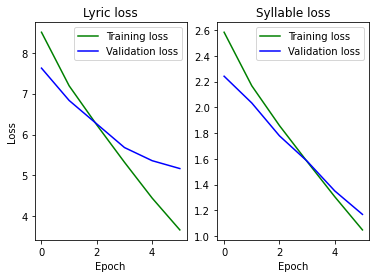

-----------
| Training Epoch:   7/ 25     185/   189 | lr:0.00100 |  110.30 s/batch | 109120.77 ms/data_load | Loss(Syllable) 0.82273 | Loss(Lyrics) 2.98702 |
| Validation Epoch:   7/ 25      20/    21 | lr:0.00100 |    5.75 s/batch | 5257.60 ms/data_load | Loss(Syllable) 1.13161 | Loss(Lyrics) 5.02011 |


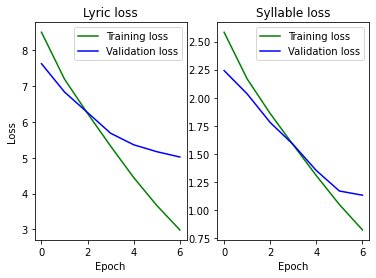

-----------
| Training Epoch:   8/ 25     185/   189 | lr:0.00100 |  112.17 s/batch | 110988.94 ms/data_load | Loss(Syllable) 0.64003 | Loss(Lyrics) 2.40112 |
| Validation Epoch:   8/ 25      20/    21 | lr:0.00100 |    6.10 s/batch | 5602.71 ms/data_load | Loss(Syllable) 1.03234 | Loss(Lyrics) 5.02447 |


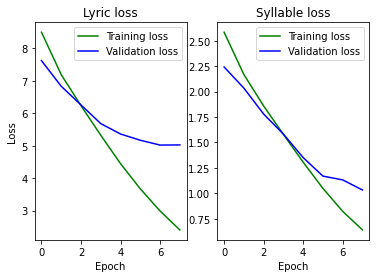

-----------
| Training Epoch:   9/ 25     185/   189 | lr:0.00100 |  111.24 s/batch | 110071.46 ms/data_load | Loss(Syllable) 0.50014 | Loss(Lyrics) 1.92244 |
| Validation Epoch:   9/ 25      20/    21 | lr:0.00100 |    5.92 s/batch | 5415.07 ms/data_load | Loss(Syllable) 1.01932 | Loss(Lyrics) 5.01525 |


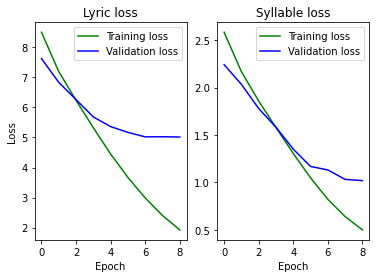

-----------
| Training Epoch:  10/ 25     185/   189 | lr:0.00100 |  111.20 s/batch | 110028.52 ms/data_load | Loss(Syllable) 0.39291 | Loss(Lyrics) 1.53468 |
| Validation Epoch:  10/ 25      20/    21 | lr:0.00100 |    6.11 s/batch | 5615.00 ms/data_load | Loss(Syllable) 0.98668 | Loss(Lyrics) 5.05509 |


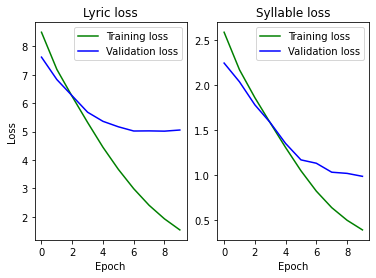

-----------
| Training Epoch:  11/ 25     185/   189 | lr:0.00100 |  110.87 s/batch | 109699.21 ms/data_load | Loss(Syllable) 0.31470 | Loss(Lyrics) 1.21695 |
| Validation Epoch:  11/ 25      20/    21 | lr:0.00100 |    6.14 s/batch | 5649.35 ms/data_load | Loss(Syllable) 1.00958 | Loss(Lyrics) 5.11243 |


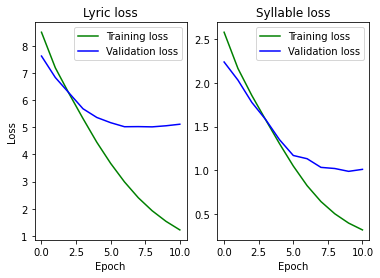

-----------
| Training Epoch:  12/ 25     185/   189 | lr:0.00100 |  111.24 s/batch | 110070.00 ms/data_load | Loss(Syllable) 0.25547 | Loss(Lyrics) 0.96469 |
| Validation Epoch:  12/ 25      20/    21 | lr:0.00100 |    6.22 s/batch | 5739.68 ms/data_load | Loss(Syllable) 0.99930 | Loss(Lyrics) 5.14562 |


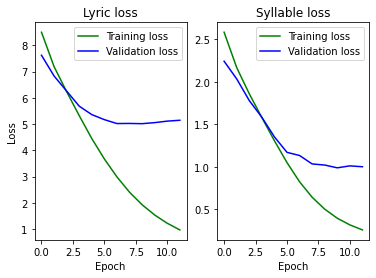

-----------
| Training Epoch:  13/ 25     185/   189 | lr:0.00100 |  110.85 s/batch | 109669.16 ms/data_load | Loss(Syllable) 0.21214 | Loss(Lyrics) 0.76916 |
| Validation Epoch:  13/ 25      20/    21 | lr:0.00100 |    6.04 s/batch | 5543.38 ms/data_load | Loss(Syllable) 1.01956 | Loss(Lyrics) 5.23622 |


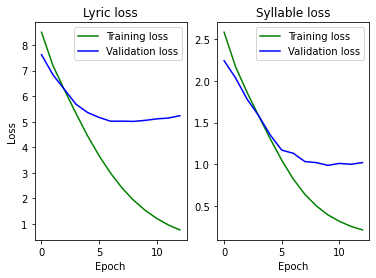

-----------
| Training Epoch:  14/ 25     185/   189 | lr:0.00100 |  111.50 s/batch | 110320.91 ms/data_load | Loss(Syllable) 0.17794 | Loss(Lyrics) 0.60967 |
| Validation Epoch:  14/ 25      20/    21 | lr:0.00100 |    6.19 s/batch | 5697.14 ms/data_load | Loss(Syllable) 1.02409 | Loss(Lyrics) 5.30695 |


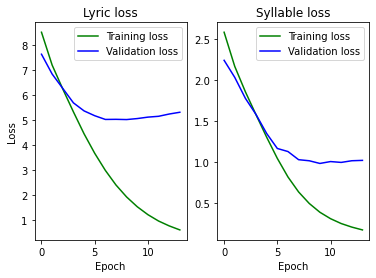

-----------
| Training Epoch:  15/ 25     185/   189 | lr:0.00100 |  111.34 s/batch | 110172.23 ms/data_load | Loss(Syllable) 0.15243 | Loss(Lyrics) 0.49321 |
| Validation Epoch:  15/ 25      20/    21 | lr:0.00100 |    5.89 s/batch | 5394.95 ms/data_load | Loss(Syllable) 1.05725 | Loss(Lyrics) 5.37177 |


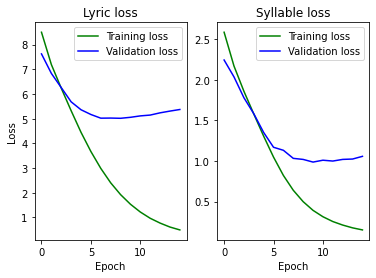

-----------
| Training Epoch:  16/ 25     185/   189 | lr:0.00100 |  110.79 s/batch | 109613.55 ms/data_load | Loss(Syllable) 0.13117 | Loss(Lyrics) 0.40089 |
| Validation Epoch:  16/ 25      20/    21 | lr:0.00100 |    6.17 s/batch | 5671.96 ms/data_load | Loss(Syllable) 1.04481 | Loss(Lyrics) 5.48171 |


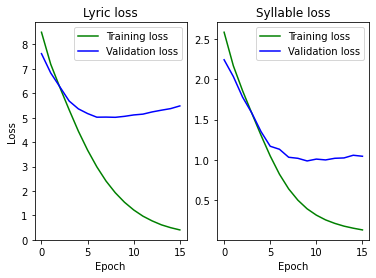

-----------
| Training Epoch:  17/ 25     185/   189 | lr:0.00100 |  110.71 s/batch | 109535.18 ms/data_load | Loss(Syllable) 0.11541 | Loss(Lyrics) 0.33596 |
| Validation Epoch:  17/ 25      20/    21 | lr:0.00100 |    6.19 s/batch | 5684.56 ms/data_load | Loss(Syllable) 1.07918 | Loss(Lyrics) 5.52557 |


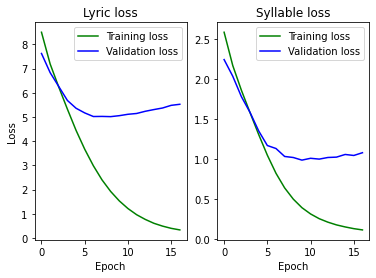

-----------
| Training Epoch:  18/ 25     185/   189 | lr:0.00100 |  111.57 s/batch | 110393.63 ms/data_load | Loss(Syllable) 0.10243 | Loss(Lyrics) 0.29053 |
| Validation Epoch:  18/ 25      20/    21 | lr:0.00100 |    5.91 s/batch | 5406.15 ms/data_load | Loss(Syllable) 1.04251 | Loss(Lyrics) 5.55059 |


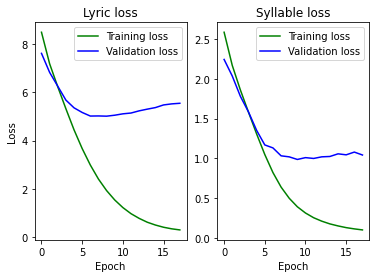

-----------
| Training Epoch:  19/ 25     185/   189 | lr:0.00100 |  111.17 s/batch | 109996.58 ms/data_load | Loss(Syllable) 0.09233 | Loss(Lyrics) 0.25890 |
| Validation Epoch:  19/ 25      20/    21 | lr:0.00100 |    6.17 s/batch | 5677.80 ms/data_load | Loss(Syllable) 1.11831 | Loss(Lyrics) 5.63143 |


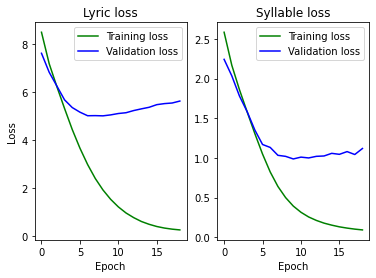

-----------
| Training Epoch:  20/ 25     185/   189 | lr:0.00100 |  112.20 s/batch | 111023.48 ms/data_load | Loss(Syllable) 0.08482 | Loss(Lyrics) 0.24145 |
| Validation Epoch:  20/ 25      20/    21 | lr:0.00100 |    5.80 s/batch | 5302.12 ms/data_load | Loss(Syllable) 1.03224 | Loss(Lyrics) 5.64678 |


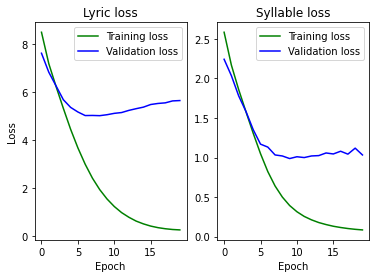

-----------
| Training Epoch:  21/ 25     185/   189 | lr:0.00100 |  111.76 s/batch | 110586.96 ms/data_load | Loss(Syllable) 0.07867 | Loss(Lyrics) 0.22769 |
| Validation Epoch:  21/ 25      20/    21 | lr:0.00100 |    5.98 s/batch | 5489.21 ms/data_load | Loss(Syllable) 1.13739 | Loss(Lyrics) 5.69879 |


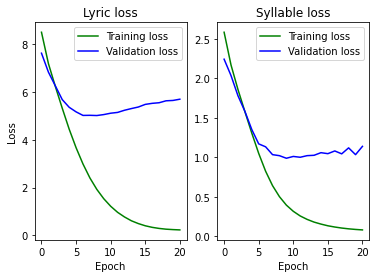

-----------
| Training Epoch:  22/ 25     185/   189 | lr:0.00100 |  113.19 s/batch | 112010.95 ms/data_load | Loss(Syllable) 0.07335 | Loss(Lyrics) 0.22490 |
| Validation Epoch:  22/ 25      20/    21 | lr:0.00100 |    5.94 s/batch | 5443.11 ms/data_load | Loss(Syllable) 1.07595 | Loss(Lyrics) 5.71146 |


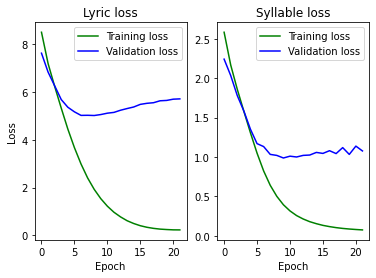

-----------
| Training Epoch:  23/ 25     185/   189 | lr:0.00100 |  111.53 s/batch | 110347.62 ms/data_load | Loss(Syllable) 0.06863 | Loss(Lyrics) 0.22204 |
| Validation Epoch:  23/ 25      20/    21 | lr:0.00100 |    6.28 s/batch | 5781.08 ms/data_load | Loss(Syllable) 1.13273 | Loss(Lyrics) 5.77544 |


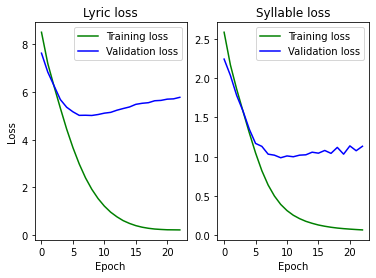

-----------
| Training Epoch:  24/ 25     185/   189 | lr:0.00100 |  111.97 s/batch | 110788.31 ms/data_load | Loss(Syllable) 0.06364 | Loss(Lyrics) 0.20858 |
| Validation Epoch:  24/ 25      20/    21 | lr:0.00100 |    5.92 s/batch | 5432.03 ms/data_load | Loss(Syllable) 1.10387 | Loss(Lyrics) 5.78271 |


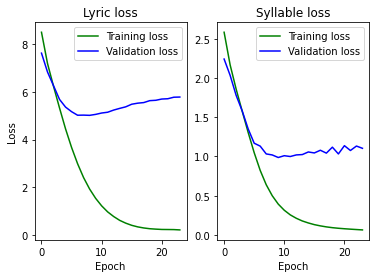

-----------
| Training Epoch:  25/ 25     185/   189 | lr:0.00100 |  111.98 s/batch | 110803.61 ms/data_load | Loss(Syllable) 0.05838 | Loss(Lyrics) 0.19460 |
| Validation Epoch:  25/ 25      20/    21 | lr:0.00100 |    5.78 s/batch | 5288.73 ms/data_load | Loss(Syllable) 1.08142 | Loss(Lyrics) 5.80665 |


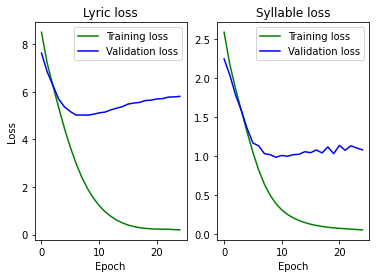

-----------
Total elapsed time:   98.17 minutes

Elapsed =  98.173371108373


In [0]:
# Train
%run ./c-LSTM-LM/train.py

In [0]:
# Test generate script
!pip install mido
%run ./c-LSTM-LM/generate_deeper.py


In [5]:
!pip install mido
%run ./c-LSTM-LM/statistics.py

     |████████████████████████████████| 61kB 1.7MB/s 
------ Parameters -----
            midi:  ./c-LSTM-LM/sample_data/sample.midi
          output:  ./c-LSTM-LM/test_output/
            data:  ./dataset_creation/augmented_dataset4_sorted_test
           param:  ./c-LSTM-LM/checkpoint_12052020_1500/model.param.json
      checkpoint:  ./c-LSTM-LM/checkpoint_12052020_1500/
    deeper_param:  ./c-LSTM-LM/checkpoint_03062020_1030/model.param.json
deeper_checkpoint:  ./c-LSTM-LM/checkpoint_03062020_1030/
            seed:  0
          window:  20
     temperature:  1.0
        LM_model:  model_25.pt
 deeper_LM_model:  model_06.pt
Currently loading data from: sub_folder1
Song name:  081a6bc3d91b5295f241e84fbb90f666
[('rest', 32), (68.0, 1.0), (71.0, 0.75), (71.0, 1.0), (68.0, 0.25), ('rest', 2.0), (71.0, 1.5), (71.0, 1.0), ('rest', 8.0), (68.0, 1.0), (71.0, 1.0), (71.0, 1.0), ('rest', 1.0), (69.0, 1.0), (68.0, 1.0), ('rest', 1.0), (64.0, 1.0), (61.0, 1.0), (64.0, 2.0), ('rest', 4.0), (64.0

/content/drive/My Drive/Studier/Master/Master Thesis/Coding/c-LSTM-LM/generate_deeper.py:26: RuntimeWarning: divide by zero encountered in log
  preds = np.log(preds) / temperature
Generate lyrics [==============>------] (74.8 %)

KeyError: ignored

In [0]:
pn = [16, 32]
for f in pn:
  print(float(f))

16.0
32.0
